# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [6]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import gamma
%matplotlib inline

## 1. Gamma Distribution with itakura-saito as Bregman Divergenses

### 1.1 Selecting best way to represent Gamma Distribution with Non- negative Values

Gamma Distribution from definition does no take negative values.

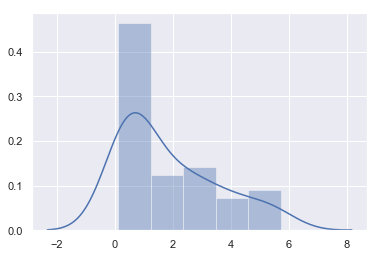

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
shape, scale = 1, 2 
V = rs.gamma(1, 2 ,10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])

### 1.2 Test NMF for Data coming from Gamma Distribution

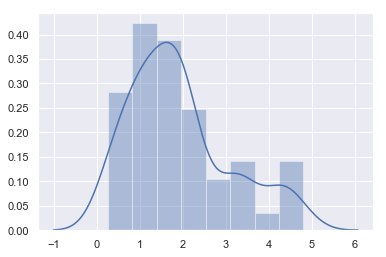

In [15]:
rs = RandomState(76321654)
a = 1.99
V = gamma.rvs(a, size=10000, random_state= rs).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])

#### LOG Likelihood 

In [40]:
def neg_log_gamma(V,B,C):
    logs_likelihoods = gamma.logpdf(V, B.dot(C))
    neg_logs = - logs_likelihoods
    
    return np.nansum(neg_logs)

In [41]:
n = 10

### Sklearn Implementation

In [42]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs, max_iter = 200)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = neg_log_gamma(V, Ws, Hs)
print('Negative Log Likelihood Between Sklearn Results and V :' + str(diffS / (V.shape[0] * V.shape[1])))

Negative Log Likelihood Between Sklearn Results and V :1.461230264395351


### My Implementation Gaussian

In [43]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM / (V.shape[0] * V.shape[1])))

Negative Log Likelihood Between Sklearn Results Between My Results and V :1.460804614171735


### My Implementation Poisson 

In [44]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM / (V.shape[0] * V.shape[1])))

Negative Log Likelihood Between Sklearn Results Between My Results and V :1.4518726623863039


### My Implementation Gamma

In [45]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma', max_iterations = 200)
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM / (V.shape[0] * V.shape[1])))

Negative Log Likelihood Between Sklearn Results Between My Results and V :1.4832532403395133


### Combination of My and Sklearn

In [46]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gamma', max_iter = 200)
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =neg_log_gamma(V, W2,H2)
print('Negative Log Likelihood Between My Results and V :' + str(diffM2 / (V.shape[0] * V.shape[1])))

Negative Log Likelihood Between My Results and V :1.5668397406007595


### Compare the three Approaches

In [48]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

# Compare with poisson 
errorsmyPo = np.zeros(50)
lmyPo = np.zeros(50)


for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with itakura-saito
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='itakura-saito')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
    
    # My with Poisson
    rs = RandomState(76321654)
    nmfPo = nmfmy(n_components=n,random_state=rs,  distribution = 'poisson')
    Wpo, Hpo = nmfPo.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gamma')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffMPo = mean_squared_error(V, Wpo.dot(Hpo))
    errorsmyPo[n-1] = diffMPo
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_gamma(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_gamma(V, Ws2, Hs2)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_gamma(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_gamma(V, Wnormal, Hnormal)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffMpo = neg_log_gamma(V, Wpo, Hpo)
    lmyPo[n-1] = diffMpo / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_gamma(V, W2 , H2)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

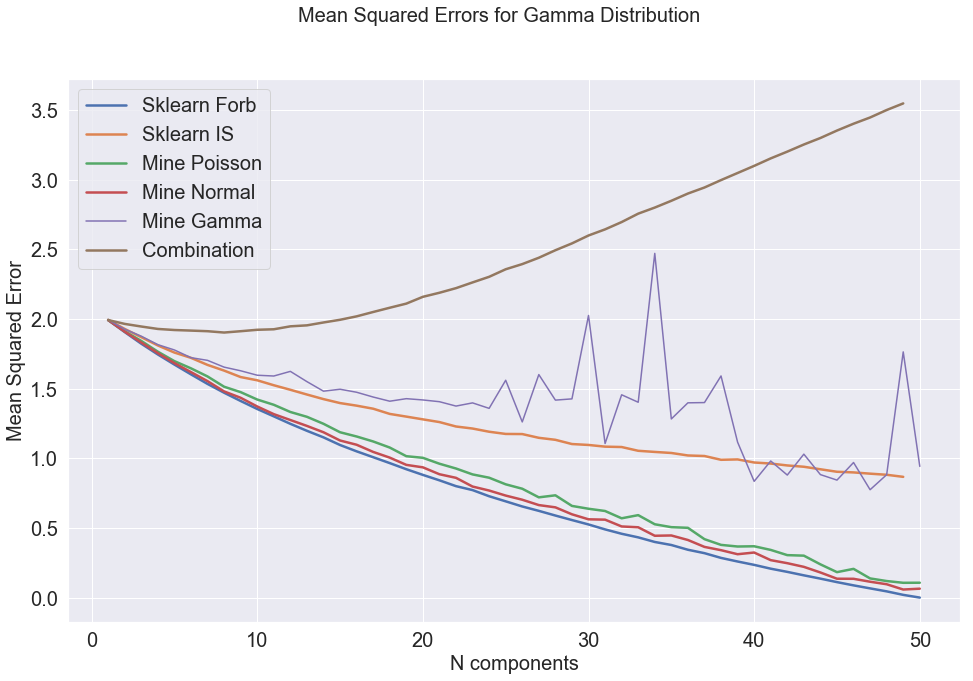

In [49]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 50), 
                  errorssk2[:-1], label="Sklearn IS", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyPo, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine Gamma")
ax_1.plot(np.arange(1, 50), 
                  errorsmy2[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Gamma Distribution', fontsize = 20)
fig_1.savefig('MeanSquaredErrorsForNMFGammaFurther.pdf')

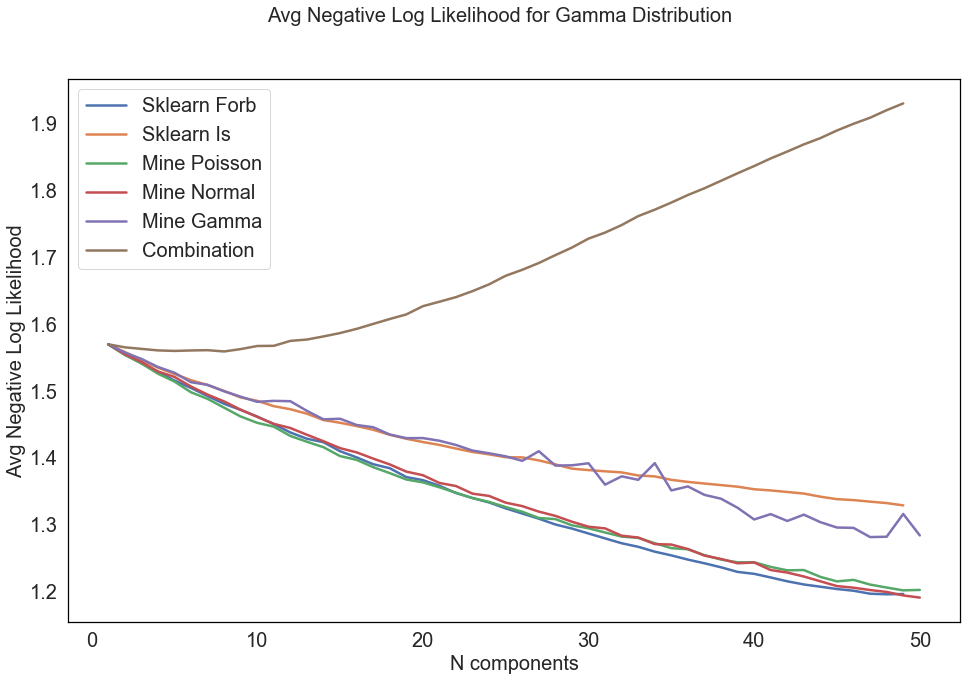

In [51]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 50), 
                  lsk[:-1], label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 50), 
                  lsk2[:-1], label="Sklearn Is", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyPo, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy, label="Mine Gamma", linewidth=2.5)
ax_1.plot(np.arange(1, 50), 
                  lmy2[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution', fontsize = 20)
fig_1.savefig('AverageNegLogLikelihoodForNMFGammaFurther.pdf')

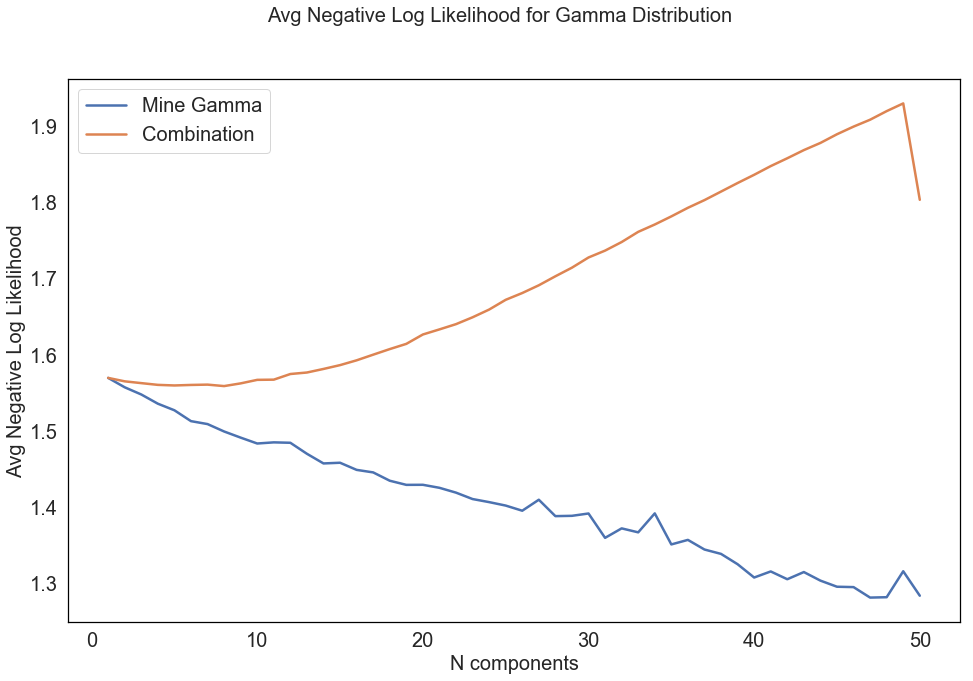

In [52]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(np.arange(1, 51), 
                  lmy, label="Mine Gamma", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution', fontsize = 20)
fig_1.savefig('AverageNegLogLikelihoodForNMFGammaCombinationMineFurther.pdf')

#### Distribution compared to Sklearn with 10 components

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 1.9897452715282882 std: 1.429450256052901
Tansformation Data : 2.0046535921475543 std: 0.7938712010085598


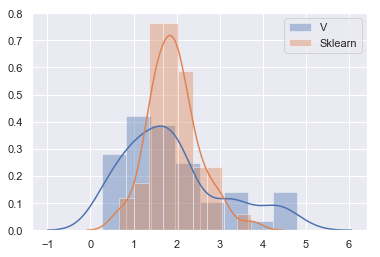

In [53]:
rs = RandomState(76321654)
n = 10
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_
sns.set(color_codes=True)
sns.distplot(V[4], label ='V')
sns.distplot(Ws.dot(Hs)[4], label='Sklearn')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(Ws.dot(Hs).mean()) + ' std: ' + str(Ws.dot(Hs).std()) )

#### Distribution compared to Mine with 10 components

Original Data mean: 1.9897452715282882 std: 1.429450256052901
Tansformation Data : 2.0078026803293514 std: 0.8468074026726616


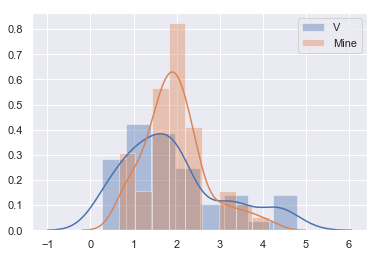

In [54]:
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

Original Data mean: 1.9897452715282882 std: 1.429450256052901
Tansformation Data : 1.9897452715282882 std: 0.7582393124791174


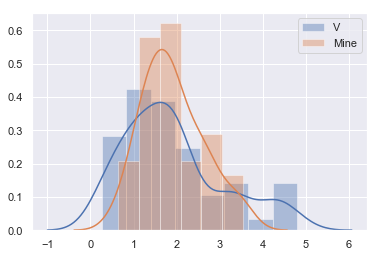

In [55]:
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

Original Data mean: 1.9897452715282882 std: 1.429450256052901
Tansformation Data : 2.0056669155296474 std: 0.7798660146810282


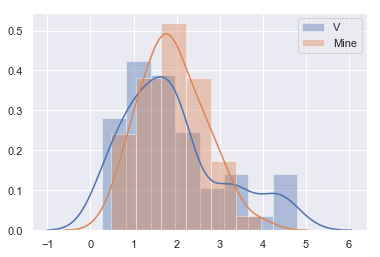

In [56]:
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Combination with 10 components

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 1.9897452715282882 std: 1.429450256052901
Tansformation Data : 2.362625962673351 std: 0.550842850810362


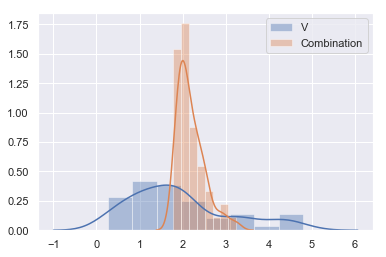

In [57]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gamma')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_
sns.set(color_codes=True)
sns.distplot(V[4],label='V')
sns.distplot(W2.dot(H2)[4], label = 'Combination')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W2.dot(H2).mean()) + ' std: ' + str(W2.dot(H2).std()) )

In [58]:
max_iterations = np.arange(1,501)

errorsmy = np.zeros(500)
lmy = np.zeros(500)

errorsSK = np.zeros(500)
lSK = np.zeros(500)

errorsmyComb = np.zeros(500)
lmyComb = np.zeros(500)


n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'gamma')
    W, H = nmfM.fit_transform(V)
    
    #My Cpmb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'gamma')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W2.dot(H2))
    errorsmyComb[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_gamma(V, W2, H2)
    lmyComb[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_gamma(V, W, H)
    lmy[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorsSK[max_it-1] = diffS
    
    # Average Neg Log Likelihoods
    
    diffS = neg_log_gamma(V, Ws, Hs)
    lSK[max_it-1] = diffS / (V.shape[0] * V.shape[1])

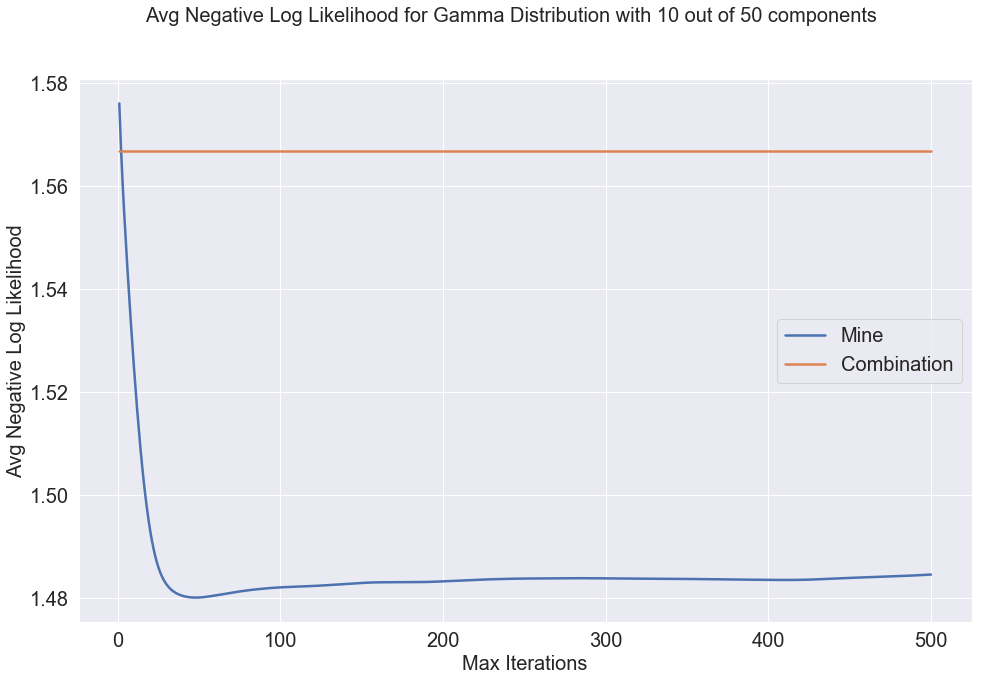

In [59]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  lmy, label="Mine", linewidth=2.5)

ax_1.plot(max_iterations, 
                  lmyComb, label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFGammaMaxIterationsFurther.pdf')

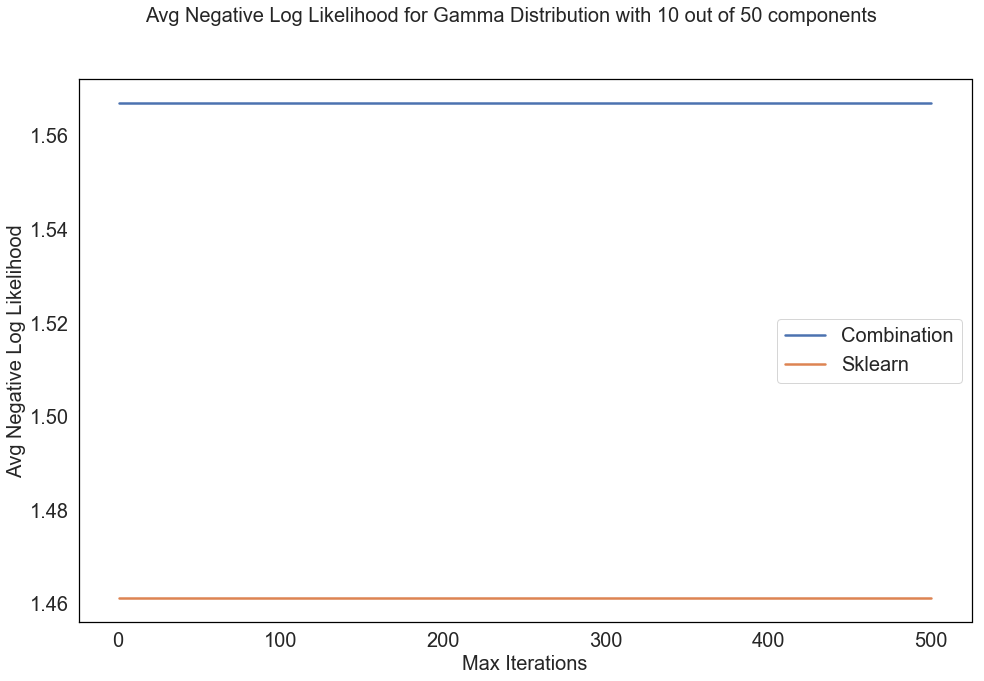

In [60]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)


ax_1.plot(max_iterations, 
                  lmyComb, label="Combination", linewidth=2.5)
ax_1.plot(max_iterations, 
                  lSK, label="Sklearn", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFGammaMaxIterationsFurtherCombiination.pdf')

In [61]:
n =10

In [62]:
max_iterations = np.arange(1,11)

errorsmy = np.zeros(10)
lmy = np.zeros(10)

errorsSK = np.zeros(10)
lSK = np.zeros(10)

errorsmyComb = np.zeros(10)
lmyComb = np.zeros(10)


n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'gamma')
    W, H = nmfM.fit_transform(V)
    
    #My Cpmb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'gamma')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W2.dot(H2))
    errorsmyComb[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_gamma(V, W2, H2)
    lmyComb[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_gamma(V, W, H)
    lmy[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorsSK[max_it-1] = diffS
    
    # Average Neg Log Likelihoods
    
    diffS = neg_log_gamma(V, Ws, Hs)
    lSK[max_it-1] = diffS / (V.shape[0] * V.shape[1])

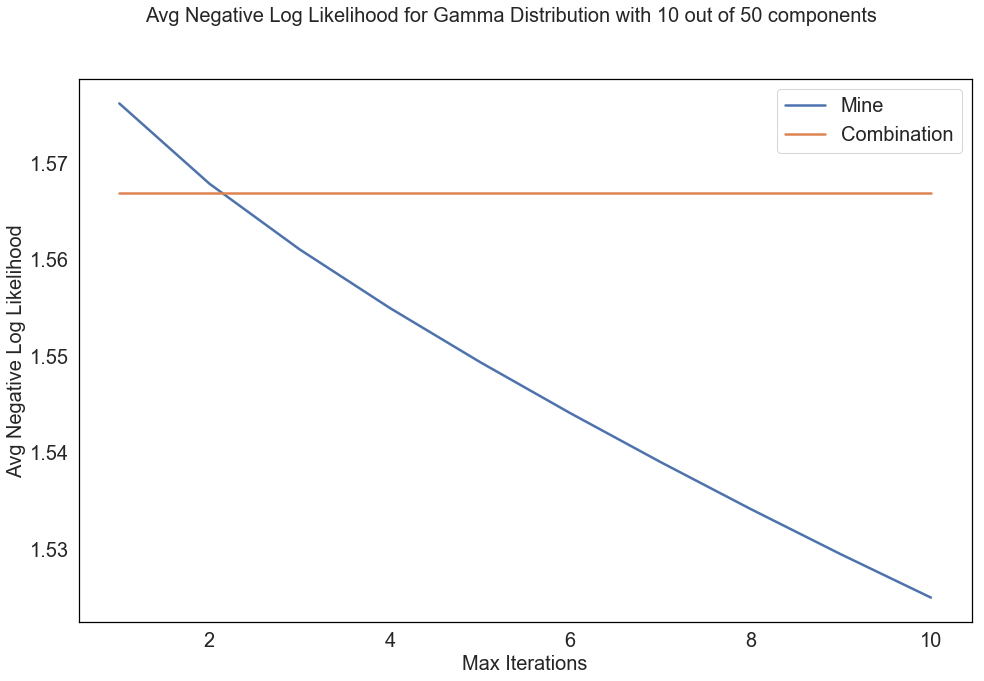

In [63]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  lmy, label="Mine", linewidth=2.5)

ax_1.plot(max_iterations, 
                  lmyComb, label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFGammaMaxIterationsFurther2.pdf')

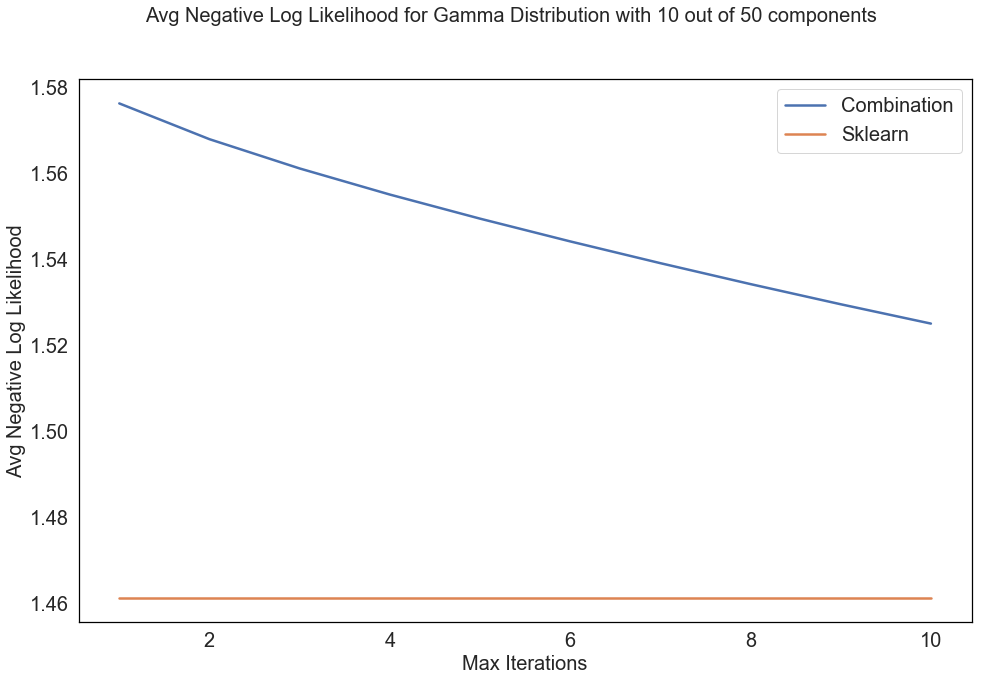

In [65]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)


ax_1.plot(max_iterations, 
                  lmy, label="Combination", linewidth=2.5)
ax_1.plot(max_iterations, 
                  lSK, label="Sklearn", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFGammaMaxIterationsFurtherCombiination2.pdf')

### Changing a (gamma parameter)